## NLP CLASSIFICATION - SENTIMENT ANALYSIS 

<img src='lv.jpg' width=500>

<img src='bufe.jpg' width=800>

### Gerekli Paketleri Tanımlama 

In [1]:
#!pip install nltk

In [2]:
import nltk
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

### Dosyamızı okuyoruz.

In [3]:
df=pd.read_csv('restaurant.csv')

### EDA - Exploratory Data Analysis- Keşifçi Veri Analizi

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [6]:
df.shape

(10417, 10)

In [7]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
df=df[['stars','text']]
#Gerekli olan sütunları seçiyoruz.

In [9]:
df.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


In [10]:
df['text'][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [11]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace("[^\w\s]" , "",regex=True)
df['text']=df['text'].str.replace('[\n]', '',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\r',' ')
#Noktalama ve diğer işaretleri kaldırıyoruz.

In [12]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [13]:
df['stars'].value_counts()

stars
5    4247
4    2636
3    1561
1    1056
2     917
Name: count, dtype: int64

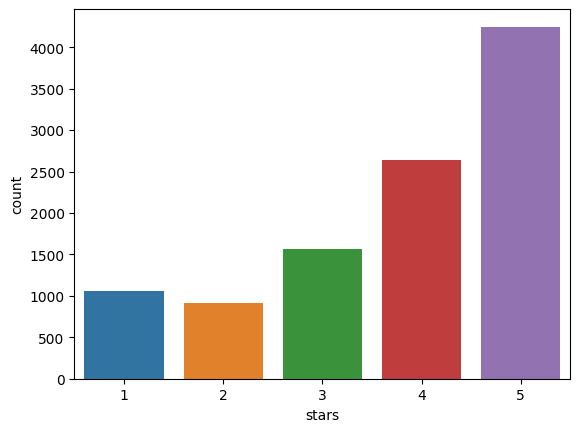

In [14]:
sns.countplot(x=df['stars']);

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### İngilizce Olmayan Dilleri Ayırma

In [18]:
#pip install langdetect

In [19]:
from langdetect import detect

In [20]:
df['lang']=df['text'].apply(lambda x: detect(x))

In [21]:
df['lang'].value_counts()

lang
en       10373
es          10
zh-cn        7
ja           7
ko           6
fr           5
de           4
da           2
sw           1
pt           1
sk           1
Name: count, dtype: int64

<Axes: xlabel='lang', ylabel='count'>

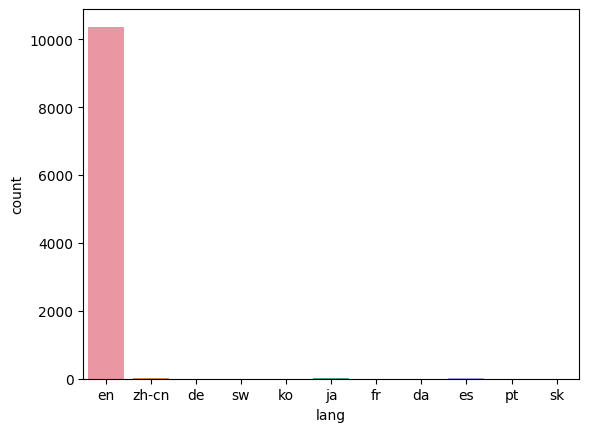

In [22]:
sns.countplot(x=df['lang'])

In [23]:
detect(df['text'][5])

'en'

In [24]:
df[df['lang'] == 'zh-cn']

,stars,text,lang
195,1,真心不怎么样 中午没有雪蟹腿菜都很一般港式点心说的过去其他的中式菜只能说尚且入口寿司品质还行...,zh-cn
1370,3,没有做好功课千辛万苦找到才发现ces期间的晚餐要近刀都想打退堂鼓了其实拉斯维加斯的自助餐都并...,zh-cn
3628,5,凯撒宫的自助餐怎么可以这么棒帝王蟹生蚝虾蟹鲜美无比羊排叉烧披萨提拉米苏布丁每一样都想说umm...,zh-cn
9151,3,其实还好没有评价说的那么好 毕竟他只是一家buffet 餐厅首先值得点赞的是他的品种很多你可...,zh-cn
9254,1,食物还可以但吃饭要排很久的队而且歧视中国人吃饭还要出示护照不是很好找在凯撒一楼赌场的里面牛排...,zh-cn
10127,4,很多种类的选择有海鲜甜点和各国的美食就是现在价格变贵了周日美元一位价格还是不便宜的味道还是不...,zh-cn
10366,1,看了网上的广告去的非常失望菜色没有那么丰富大部分菜品颜色暗沉给人感觉不新鲜最想吃的蟹腿肉质又...,zh-cn


In [25]:
df[df['lang'] == 'de']

,stars,text,lang
464,5,die auswahl ist gigantisch es gibt verschieden...,de
2705,5,das beste buffet in las vegas und ich habe al...,de
4933,5,buffetrestaurants haben fast alle hotels in la...,de
5809,3,super auswahl mega groß schönes ambieteaber de...,de


In [26]:
df[df['lang'] == 'ko']

,stars,text,lang
864,3,談到位於賭城的自助餐十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 caesar...,ko
1962,2,食物真的很差要排隊三個小時以他的聲譽來說每位元的價錢不算貴不過進到去真是大吃一驚食物真的很差...,ko
2185,2,完全無法理解這間被推薦的原因到底為何相當 相當 相當 普通的一間把費只有西式料理的質 還算可...,ko
4113,1,慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊啊ーー i...,ko
4842,4,空間明亮 prime rib很好吃 甜點種類很多 也都好吃但是中式方面種類比較少但是我不介意...,ko
10284,4,這是我第一次到這個餐廳吃飯因為它在yelp的評分很高所以我想去試試果然是一家好餐廳雖然菜色不...,ko


In [27]:
df = df[df['lang'] == 'en']
#İngilizce olmayan yorumları çıkarıyoruz.

In [28]:
df['lang'].unique()

array(['en'], dtype=object)

In [29]:
df.head()

,stars,text,lang
0,5,after getting food poisoning at the palms hote...,en
1,4,a feast worthy of godsbaccarnal buffet in caes...,en
2,4,the crab legs are better than the ones at wick...,en
3,1,not worth it too salty food and expensive this...,en
4,5,i would give this infinite stars if i could my...,en


In [30]:
new_data=df

In [31]:
new_data.to_csv('new_data.csv')

### TF/ IDF 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [33]:
vect=CountVectorizer()

In [34]:
tf=pd.DataFrame(vect.fit_transform(df['text']).toarray(),columns=vect.get_feature_names_out())

In [35]:
tf1=vect.fit_transform(df['text']).toarray().sum(axis=0)

### Sentiment Analizi

In [36]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3,'sentiment')]='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'
#Yorum yapanlarda 1 ve 2 yıldız verenleri negatif,3 yıldızı nötr,4 ve 5 yıldızı pozitif olarak alıyoruz.

In [37]:
df.head()

,stars,text,lang,sentiment
0,5,after getting food poisoning at the palms hote...,en,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive
2,4,the crab legs are better than the ones at wick...,en,positive
3,1,not worth it too salty food and expensive this...,en,negative
4,5,i would give this infinite stars if i could my...,en,positive


In [38]:
df['sentiment'].value_counts()

sentiment
positive    6852
negative    1964
neutral     1557
Name: count, dtype: int64

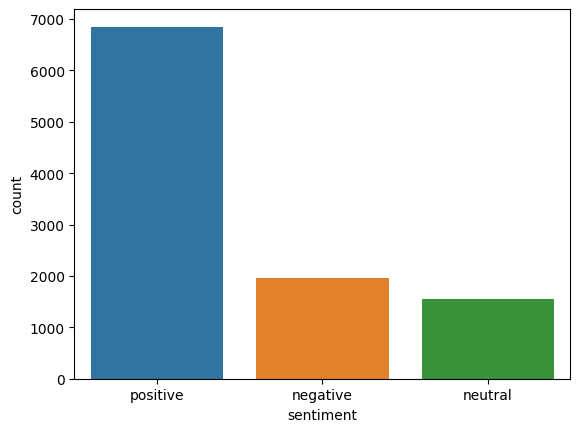

In [39]:
sns.countplot(x=df['sentiment']);

### Word Cloud Oluşturma

In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [42]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [43]:
like=df[df['stars']==5]['text']

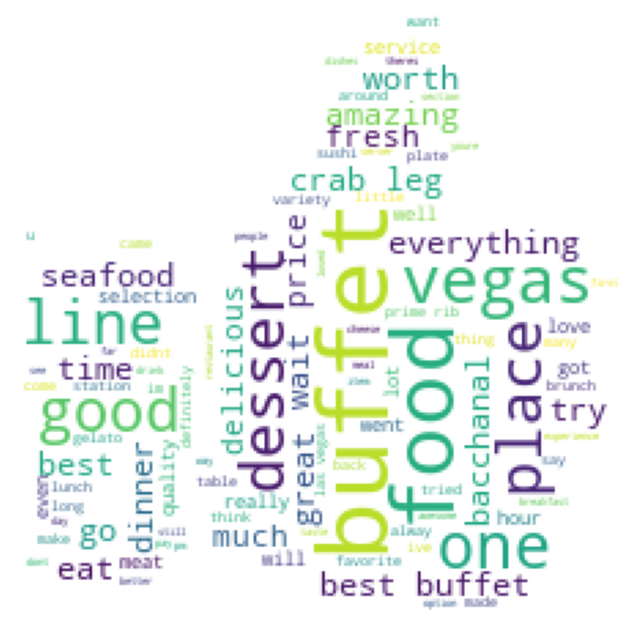

In [44]:
wc(like,'white')
#5 yıldız verenlerin wordcloudu

In [45]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('d.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [46]:
dislike=df[df['stars']==1]['text']

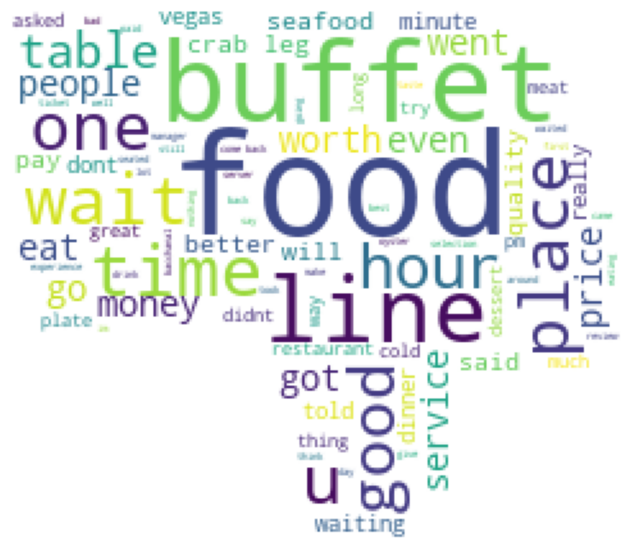

In [47]:
wc(dislike,'white')
#1 yıldız verenlerin wordcloudu

In [48]:
pozitif=df[df['sentiment']=='positive']['text']
negatif=df[df['sentiment']=='negative']['text']
nötr=df[df['sentiment']=='neutral']['text']

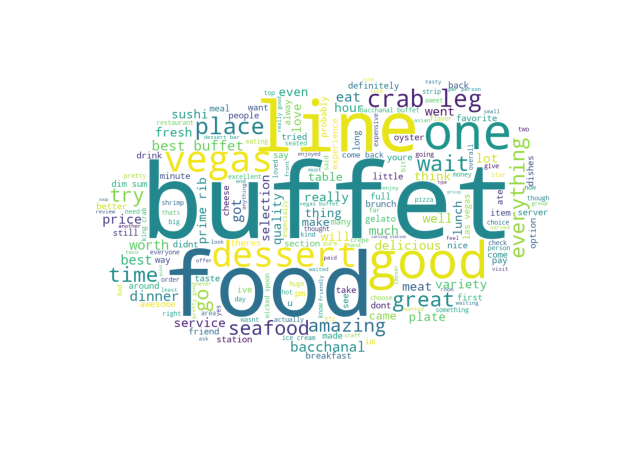

In [49]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords=STOPWORDS, mask = mask) 
    wc.generate(' '.join(data))
    plt.imshow(wc)    
    plt.axis("off")
    

wc(pozitif)
#Pozitif yorum yapanların wordcloudu

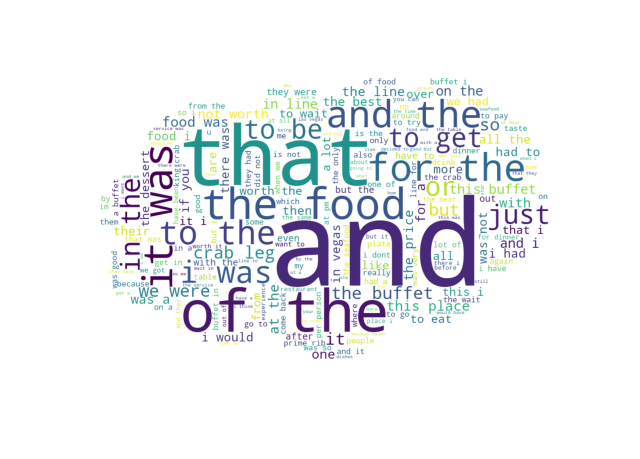

In [50]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords='STOPWORDS', mask = mask) 
    wc.generate(' '.join(data))
    plt.imshow(wc)    
    plt.axis("off")
    

wc(negatif)
#Negatif yorum yapanların wordcloudu

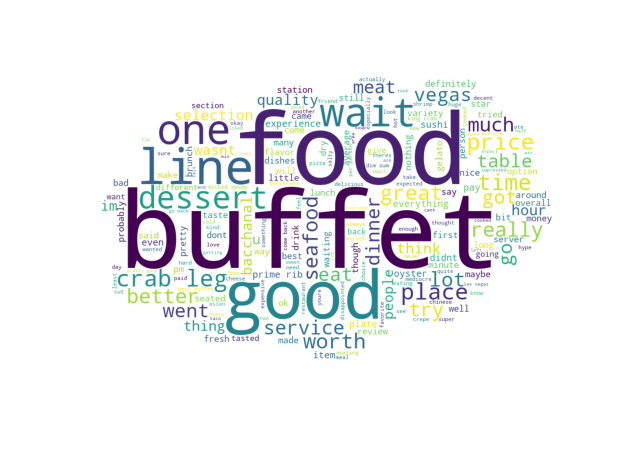

In [51]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords=STOPWORDS, mask = mask) 
    wc.generate(' '.join(data))
    plt.imshow(wc)    
    plt.axis("off")
    

wc(nötr)
#Nötr yorum yapanlar

In [52]:
pozitif.sample(7)

5757     so many options so little time i came here for...
1922     bacchanal is the buffets of all buffets if it ...
10408    the bacchanal buffet is in my opinion the best...
6098     long wait but decent selection weak desserts p...
3961     went to vegas for the first time this year nar...
8334     how much would you pay for a popular  busy buf...
10381    yummo so bomb dot com love this place yum yum ...
Name: text, dtype: object

In [53]:
pozitif[8761]

'omg so good so freaking good well worth the hour long wait for a monday lunch seriously the moment i was in i had no idea where to go first so much good food fresh shrimp prime rib sushi italian chinese mexican everything i dont think i have ever eaten so much food at one time i really recommend wearing stretchy pants youll be so stuff that youll really appreciate more belly space pmy favorite part of the buffet was by far the dessert station there were loads of ice creams tiramisu strawberry shortcake multiple kinds of creme brulee and even a crepemaking station ah it was foodie heaven i cannot wait to go back the next time im in vegas'

In [54]:
negatif.sample(7)

6957    quality went down hill use to be the best when...
2531    the food is ok not the best but the wait is ho...
5097    no oysters for the sunday brunch  staff inform...
2341    the server at our table was the very best part...
3370    this review is based on my third and last visi...
2725    the food is excellent here but the service is ...
7451    i enjoyed this buffet but definitely not worth...
Name: text, dtype: object

In [55]:
negatif[458]

'place is severely overrated and over priced in my opinion  the menu seems nice at a glance eg chicken and waffles crab legs carved meats italian asian but very poorly executed  the food was not fresh at all and many of the dishes i tried were overcooked  the staff also left much to be desired  i found them to completely unattentive and disengaged  we literally had to clear our own table placed our finished plates at a nearby hutch and was not able to get assistance unless we got up from our table and walked up to someone and asked for it  take your  and spend it somewhere else wicked spoon bellagio anywhere'

In [56]:
nötr.sample(7)

2486     when i read that the bacchanal buffet was the ...
10063    this would be a  star review if not for the ru...
4940     a big disappointment really here is the score ...
9092     we went at pm and there was no line party of  ...
7575     this was not as good as i hoped it would be  t...
1985     nothing specialway too expensive for the price...
6730     really tasty but wasnt blown awayso i have bee...
Name: text, dtype: object

In [57]:
nötr[8072]

'this is my fourth time eating here and once again i was not blown away or impressed with anything here my friends and i came for dinner a few nights ago and while the ambience was nice and the dining room was pretty the food left a lot to be desiredthe pasta dishes including the macaroni and cheese were undercooked and hard there wasnt much flavor either the pizza was also very disappointing and tasted cheap like the chuck e cheese type stuff you get at theme parks the gelato which tasted more like bland ice cream wasnt impressive either this is one of the most expensive buffets in vegas and you expect it to have very good quality that was not the case and i suggest you save a few dollars and go to the bellagio buffet instead which has better tasting foodi keep hoping that each time i come to bacchanal i will have a better experience but honestly that just has never been the case i only give three stars because there is a huge selection with many options but i value quality over quant

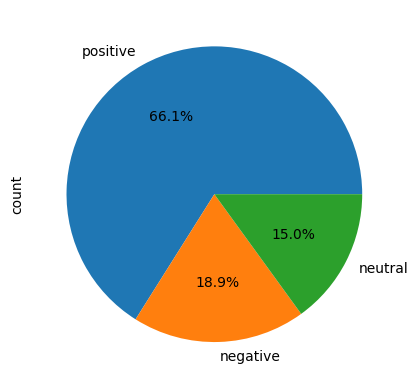

In [58]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%');

In [59]:
df.head()

,stars,text,lang,sentiment
0,5,after getting food poisoning at the palms hote...,en,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive
2,4,the crab legs are better than the ones at wick...,en,positive
3,1,not worth it too salty food and expensive this...,en,negative
4,5,i would give this infinite stars if i could my...,en,positive


In [60]:
negatif.value_counts()

text
save your money and go somewhere else the food was terrible i had to spit my food out several times it made both my husband and me feel sick we were only given a  discount after telling the manager that all the food was awful we basically paid  for some waters big thumbs down                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Polarity ve Subjectivity Hesaplama

In [61]:
from textblob import TextBlob

In [62]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [63]:
df['polarity']

0        0.337330
1        0.219409
2       -0.134722
3       -0.325000
4        0.362500
           ...   
10412    0.543750
10413    0.210101
10414    0.480000
10415    0.185185
10416    0.312500
Name: polarity, Length: 10373, dtype: float64

In [64]:
df['subjectivity']

0        0.586926
1        0.537292
2        0.731944
3        0.400000
4        0.725000
           ...   
10412    0.481250
10413    0.586869
10414    0.630000
10415    0.533333
10416    0.435833
Name: subjectivity, Length: 10373, dtype: float64

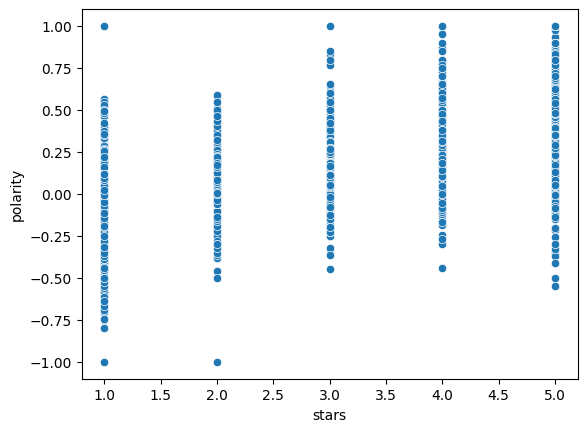

In [65]:
sns.scatterplot(x='stars' ,y='polarity', data=df);
#Yapılan yorumların verdikleri yıldıza göre polarity hesaplamasının grafiği

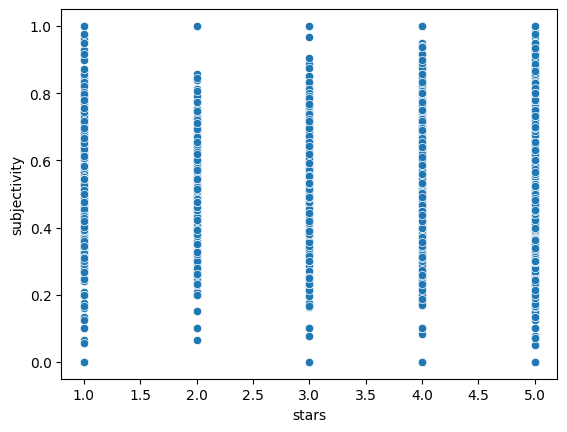

In [66]:
sns.scatterplot(x='stars' ,y='subjectivity', data=df);

In [67]:
df.head()

,stars,text,lang,sentiment,polarity,subjectivity
0,5,after getting food poisoning at the palms hote...,en,positive,0.337330,0.586926
1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive,0.219409,0.537292
2,4,the crab legs are better than the ones at wick...,en,positive,-0.134722,0.731944
3,1,not worth it too salty food and expensive this...,en,negative,-0.325000,0.400000
4,5,i would give this infinite stars if i could my...,en,positive,0.362500,0.725000


### Stop Wordsleri Kaldırma ve Vektörize Etme

In [68]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [69]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [70]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [71]:
x=df['text']
y=df['sentiment']

In [72]:
x=vect.fit_transform(x)

### Modelleme

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

### Logistic Regression

In [75]:
l=LogisticRegression()
model=l.fit(x_train,y_train)

In [76]:
import pickle

In [77]:
pickle.dump(model,open('nlp.pkl','wb'))
#modelimizi kaydediyoruz

In [78]:
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.7995180722891566

In [79]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

    negative       0.72      0.70      0.71       404
     neutral       0.38      0.46      0.41       259
    positive       0.92      0.89      0.91      1412

    accuracy                           0.80      2075
   macro avg       0.67      0.68      0.68      2075
weighted avg       0.81      0.80      0.81      2075



In [80]:
confusion_matrix(lpred, y_test)

array([[ 283,   90,   31],
       [  65,  120,   74],
       [  46,  110, 1256]], dtype=int64)

<Axes: >

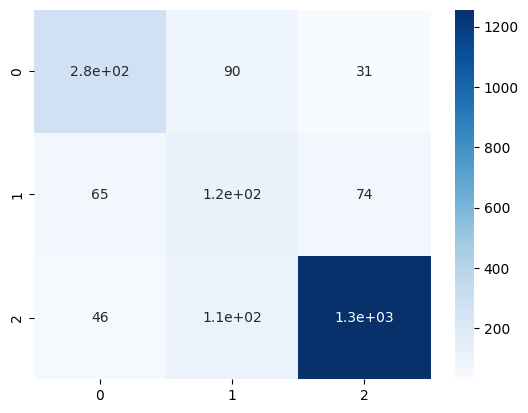

In [81]:
sns.heatmap(confusion_matrix(lpred, y_test),annot=True,cmap='Blues')

<Axes: >

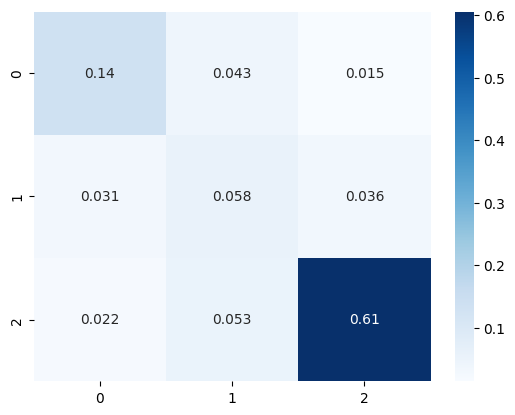

In [82]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues')
#Normalize edilmiş hali

### Decision Tree Classifier

In [83]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
dpred=d.predict(x_test)
accuracy_score(dpred,y_test)

0.6578313253012048

In [84]:
print(classification_report(dpred, y_test))

              precision    recall  f1-score   support

    negative       0.45      0.48      0.46       363
     neutral       0.25      0.26      0.25       304
    positive       0.82      0.79      0.80      1408

    accuracy                           0.66      2075
   macro avg       0.50      0.51      0.51      2075
weighted avg       0.67      0.66      0.66      2075



In [85]:
confusion_matrix(dpred, y_test)

array([[ 176,   77,  110],
       [  84,   79,  141],
       [ 134,  164, 1110]], dtype=int64)

<Axes: >

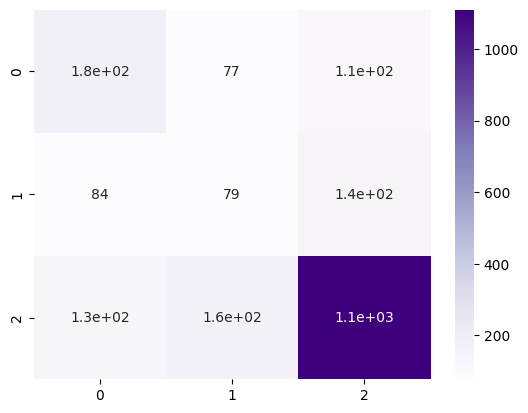

In [86]:
sns.heatmap(confusion_matrix(dpred, y_test),annot=True, cmap='Purples')

<Axes: >

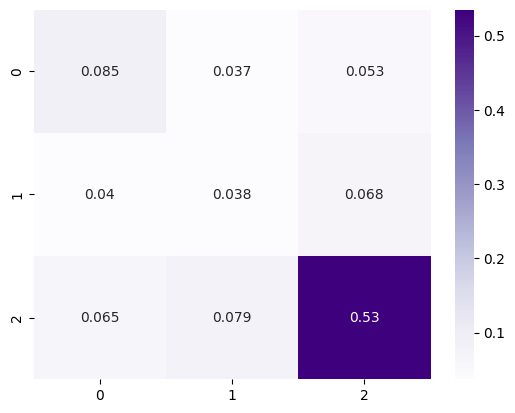

In [87]:
cm = confusion_matrix(dpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples')
#Normalize edilmiş hali

### Bernoulli 

In [88]:
b=BernoulliNB()
model=b.fit(x_train,y_train)
bpred=model.predict(x_test)
accuracy_score(bpred,y_test)

0.7040963855421687

In [89]:
print(classification_report(bpred, y_test))

              precision    recall  f1-score   support

    negative       0.52      0.71      0.60       290
     neutral       0.38      0.32      0.35       374
    positive       0.83      0.80      0.82      1411

    accuracy                           0.70      2075
   macro avg       0.58      0.61      0.59      2075
weighted avg       0.71      0.70      0.70      2075



In [90]:
confusion_matrix(bpred, y_test)

array([[ 205,   53,   32],
       [  59,  121,  194],
       [ 130,  146, 1135]], dtype=int64)

<Axes: >

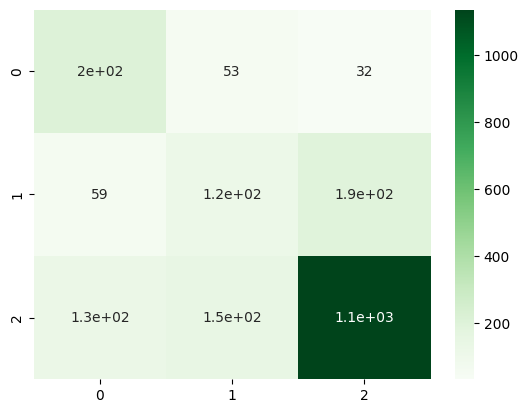

In [91]:
sns.heatmap(confusion_matrix(bpred, y_test),annot=True, cmap='Greens')

<Axes: >

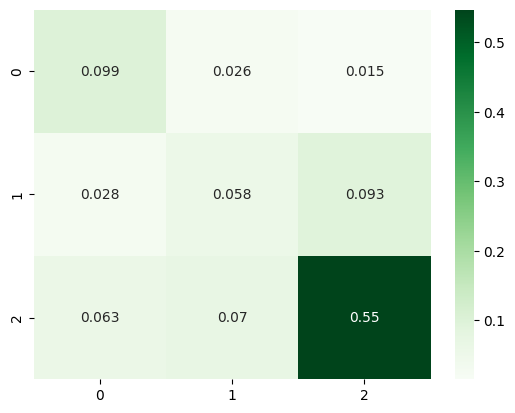

In [92]:
cm = confusion_matrix(bpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Greens')
#Normalize edilmiş hali

### Multinomial

In [93]:
nb=MultinomialNB()
model=nb.fit(x_train,y_train)
nbpred=model.predict(x_test)
accuracy_score(nbpred,y_test)

0.7893975903614457

In [94]:
print(classification_report(nbpred, y_test))

              precision    recall  f1-score   support

    negative       0.72      0.65      0.68       434
     neutral       0.42      0.48      0.45       277
    positive       0.90      0.90      0.90      1364

    accuracy                           0.79      2075
   macro avg       0.68      0.68      0.68      2075
weighted avg       0.80      0.79      0.79      2075



In [95]:
confusion_matrix(nbpred, y_test)

array([[ 283,   84,   67],
       [  72,  133,   72],
       [  39,  103, 1222]], dtype=int64)

<Axes: >

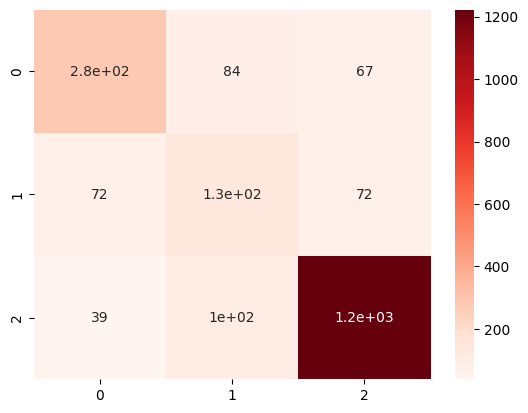

In [96]:
sns.heatmap(confusion_matrix(nbpred, y_test),annot=True, cmap='Reds')

<Axes: >

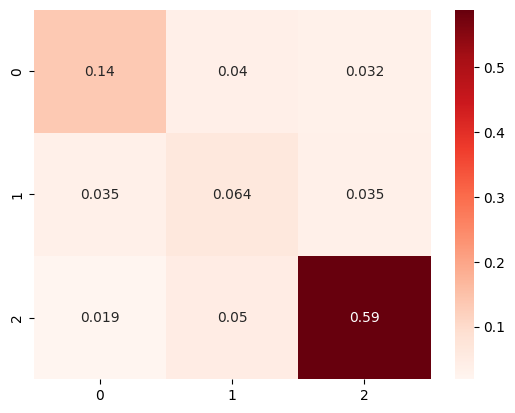

In [97]:
cm = confusion_matrix(nbpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Reds')
#Normalize edilmiş hali

### Random Forest Classifier

In [98]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
accuracy_score(rfpred,y_test)

0.7151807228915663

In [99]:
print(classification_report(rfpred, y_test))

              precision    recall  f1-score   support

    negative       0.31      0.85      0.45       143
     neutral       0.01      0.75      0.02         4
    positive       1.00      0.70      0.83      1928

    accuracy                           0.72      2075
   macro avg       0.44      0.77      0.43      2075
weighted avg       0.95      0.72      0.80      2075



In [100]:
confusion_matrix(rfpred, y_test)

array([[ 122,   19,    2],
       [   1,    3,    0],
       [ 271,  298, 1359]], dtype=int64)

<Axes: >

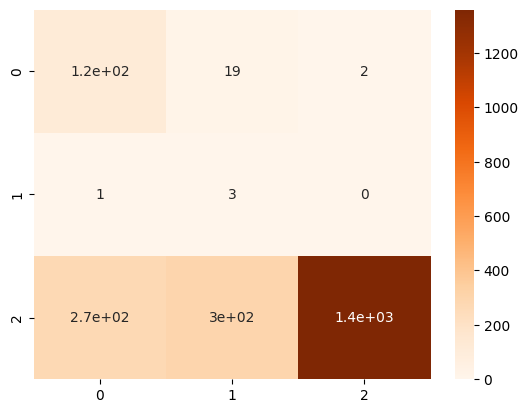

In [101]:
sns.heatmap(confusion_matrix(rfpred, y_test),annot=True, cmap='Oranges')

<Axes: >

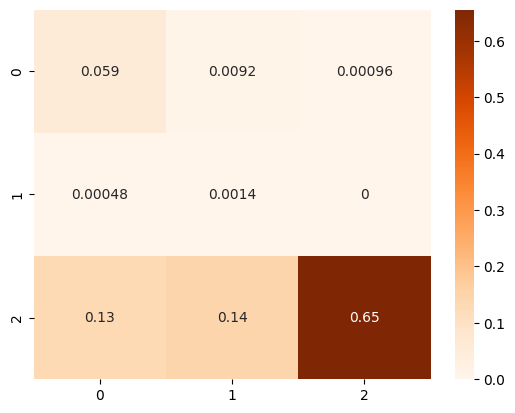

In [102]:
cm = confusion_matrix(rfpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Oranges')
#Normalize edilmiş hali

### Gradient Boosting Classifier

In [103]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
accuracy_score(gbpred,y_test)

0.7807228915662651

In [104]:
print(classification_report(gbpred, y_test))

              precision    recall  f1-score   support

    negative       0.55      0.75      0.64       291
     neutral       0.19      0.59      0.29       104
    positive       0.99      0.80      0.88      1680

    accuracy                           0.78      2075
   macro avg       0.58      0.71      0.60      2075
weighted avg       0.88      0.78      0.82      2075



In [105]:
confusion_matrix(gbpred, y_test)

array([[ 218,   61,   12],
       [  35,   61,    8],
       [ 141,  198, 1341]], dtype=int64)

<Axes: >

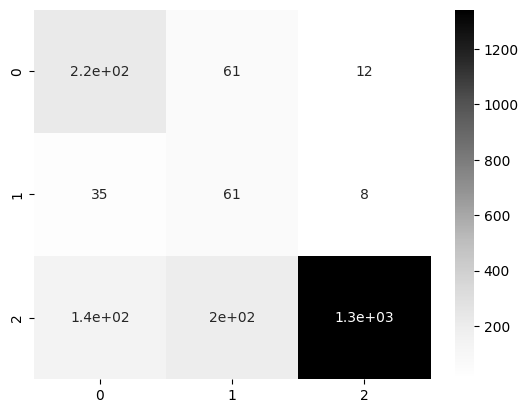

In [106]:
sns.heatmap(confusion_matrix(gbpred, y_test),annot=True, cmap='Greys')

<Axes: >

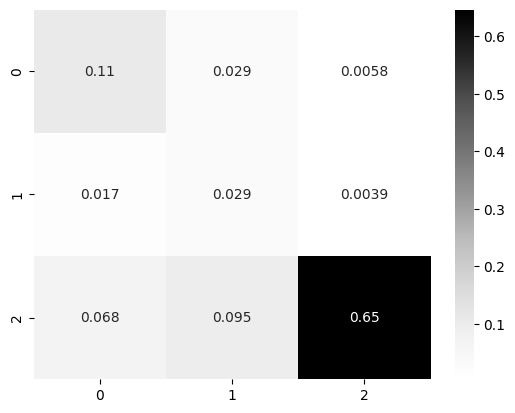

In [107]:
cm = confusion_matrix(gbpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Greys')
#Normalize edilmiş hali

### KNeighbors Classifier

In [108]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)
kpred=k.predict(x_test)
accuracy_score(kpred,y_test)

0.6679518072289157

In [109]:
print(classification_report(kpred, y_test))

              precision    recall  f1-score   support

    negative       0.27      0.48      0.35       225
     neutral       0.16      0.31      0.21       166
    positive       0.90      0.73      0.81      1684

    accuracy                           0.67      2075
   macro avg       0.45      0.51      0.46      2075
weighted avg       0.77      0.67      0.71      2075



In [110]:
confusion_matrix(kpred, y_test)

array([[ 108,   50,   67],
       [  46,   52,   68],
       [ 240,  218, 1226]], dtype=int64)

<Axes: >

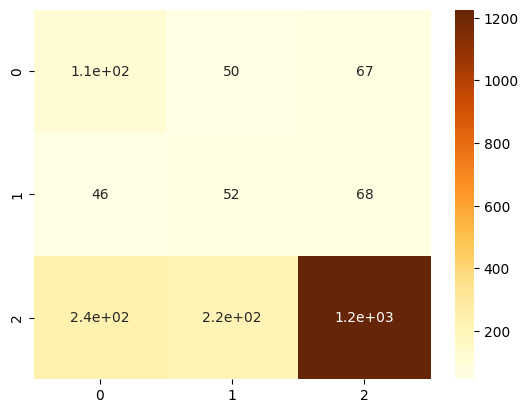

In [111]:
sns.heatmap(confusion_matrix(kpred, y_test),annot=True, cmap='YlOrBr')

<Axes: >

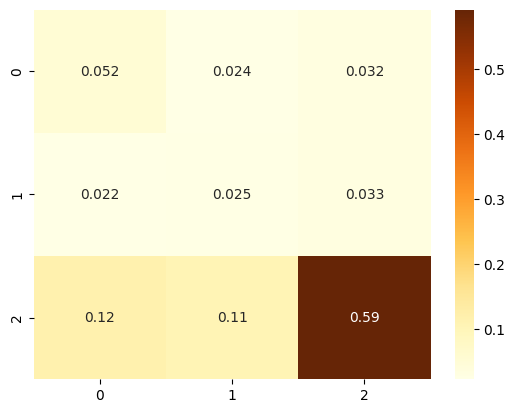

In [112]:
cm = confusion_matrix(kpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='YlOrBr')
#Normalize edilmiş hali

### Pycaret ile AutoML

In [113]:
x=df["text"]
y=df["sentiment"]

In [114]:
from pycaret.classification import*

In [115]:
a=setup(data=df,target="sentiment")

,Description,Value
0,Session id,725
1,Target,sentiment
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(10373, 6)"
5,Transformed data shape,"(10373, 6)"
6,Transformed train set shape,"(7261, 6)"
7,Transformed test set shape,"(3112, 6)"
8,Numeric features,3
9,Categorical features,2


In [116]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6890
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3680
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3270
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4660
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3030
et,Extra Trees Classifier,0.9116,1.0000,0.9116,0.9444,0.9081,0.8262,0.8392,0.4670
gbc,Gradient Boosting Classifier,0.8488,0.0000,0.8488,0.8195,0.8028,0.7052,0.7440,1.8750
dt,Decision Tree Classifier,0.8112,0.8889,0.8112,0.7839,0.7538,0.6317,0.6801,0.2600
rf,Random Forest Classifier,0.6771,1.0000,0.6771,0.7686,0.6480,0.4643,0.5318,0.5930
nb,Naive Bayes,0.6613,0.5107,0.6613,0.5235,0.5274,0.0036,0.0265,0.3280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]